## Automated anisotropic resistivity inversion for efficient formation evaluation and uncertainty quantification

### Misael M. Morales, Ali Eghbali, Oriyomi Raheem, Michael Pyrcz, Carlos Torres-Verdin
***
## Compare Gradient-Based and PINN Results
***

In [1]:
from main import *

check_torch()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
case1, case2, synthetic1, synthetic2 = load_all_data()


------------------------------------------------------------
----------------------- VERSION INFO -----------------------
Torch version: 2.2.2+cu121 | Torch Built with CUDA? True
# Device(s) available: 1, Name(s): NVIDIA GeForce RTX 3080
------------------------------------------------------------

Field Case 1: (2399, 7)
Field Case 2: (11143, 7)
Synthetic Case 1: (801, 10)
Synthetic Case 2: (415, 6)


In [2]:
data_chevron = lasio.read('cases/well1.las').df()
data_akerbp  = lasio.read('cases/well2.las').df()
data_syn1    = lasio.read('cases/Case1.LAS').df().join(lasio.read('cases/Case1_RvRh.las').df())
data_syn2    = lasio.read('cases/Case2.LAS').df()

sol_chevron = pd.read_csv('results/gradient_based_solution_Chevron.csv', index_col=0)
sol_akerbp  = pd.read_csv('results/gradient_based_solution_AkerBP.csv', index_col=0)
sol_syn1    = pd.read_csv('results/gradient_based_solution_synthetic1.csv', index_col=0)
sol_syn2    = pd.read_csv('results/gradient_based_solution_synthetic2.csv', index_col=0)

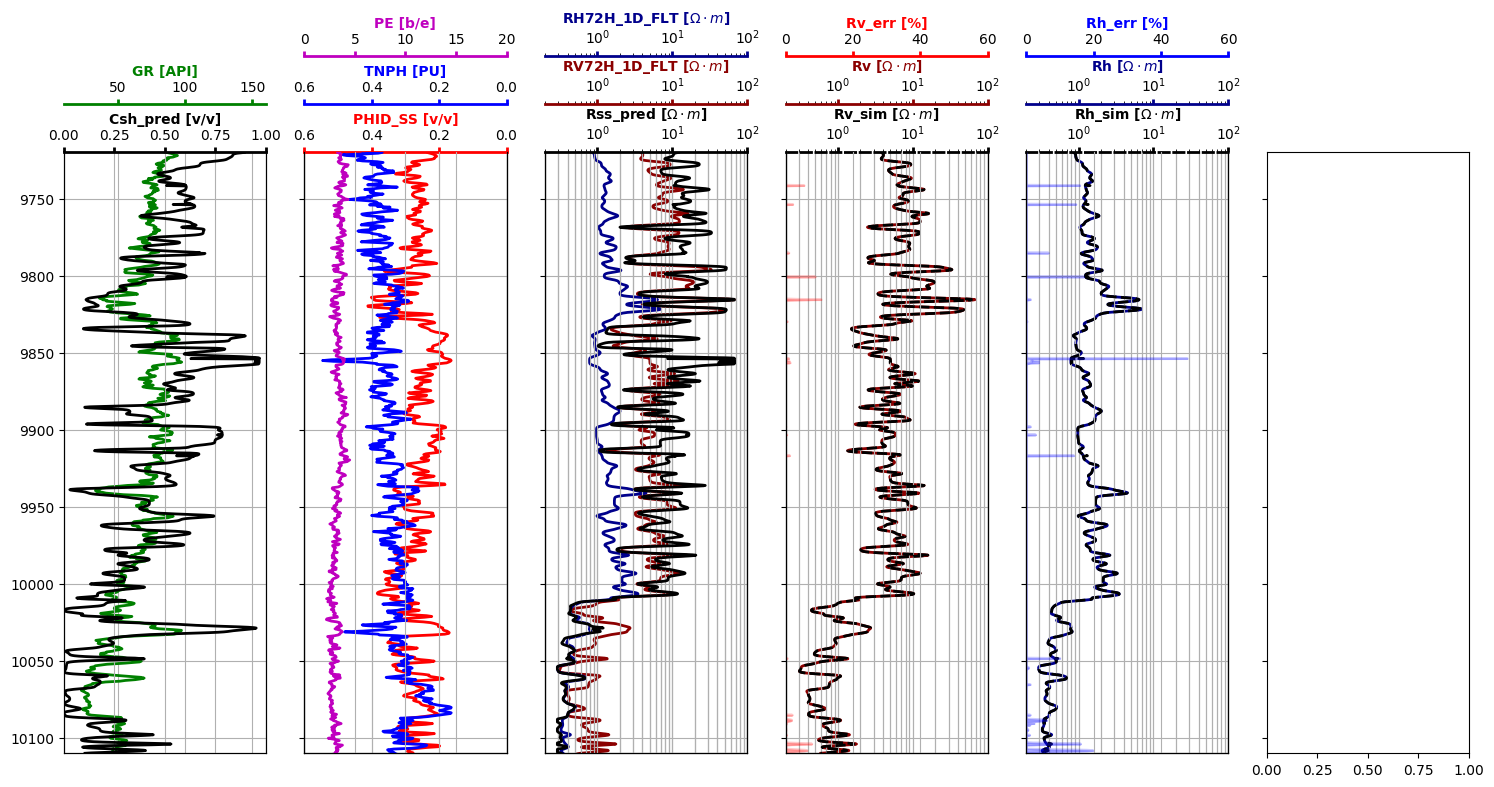

In [3]:
fig, axs = plt.subplots(1, 6, figsize=(15,8), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axs

ymin = sol_chevron.index.min()
ymax = sol_chevron.index.max()
sol_chevron['Rv_err'] = np.abs((sol_chevron['Rv'] - sol_chevron['Rv_sim'])/sol_chevron['Rv'])*100
sol_chevron['Rh_err'] = np.abs((sol_chevron['Rh'] - sol_chevron['Rh_sim'])/sol_chevron['Rh'])*100

ax11 = ax1.twiny()
plot_curve(ax11, sol_chevron, 'Csh_pred', lb=0, ub=1, color='k', units='v/v')
plot_curve(ax1, data_chevron, 'GR', lb=10, ub=160, color='g', units='API', pad=8)

ax21, ax22 = ax2.twiny(), ax2.twiny()
plot_curve(ax2, data_chevron, 'PHID_SS', lb=0.6, ub=0.0, color='r', units='v/v')
plot_curve(ax21, data_chevron, 'TNPH', lb=0.6, ub=0.0, color='b', units='PU', pad=8)
plot_curve(ax22, data_chevron, 'PE', lb=0, ub=20, color='m', units='b/e', pad=16)

ax31, ax32 = ax3.twiny(), ax3.twiny()
plot_curve(ax3, data_chevron, 'RV72H_1D_FLT', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax31, data_chevron, 'RH72H_1D_FLT', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=16)
plot_curve(ax32, sol_chevron, 'Rss_pred', lb=0.2, ub=100, color='k', units='$\Omega\cdot m$', semilog=True)

ax41, ax42 = ax4.twiny(), ax4.twiny()
plot_curve(ax4, sol_chevron, 'Rv', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax41, sol_chevron, 'Rv_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax42, sol_chevron, 'Rv_err', lb=0, ub=60, color='r', fill=True, alpha=0.2, units='%', pad=16)

ax51, ax52 = ax5.twiny(), ax5.twiny()
plot_curve(ax5, sol_chevron, 'Rh', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax51, sol_chevron, 'Rh_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax52, sol_chevron, 'Rh_err', lb=0, ub=60, color='b', fill=True, alpha=0.2, units='%', pad=16)

ax1.set(ylim=(ymin, ymax))
ax1.invert_yaxis()
plt.tight_layout()
plt.show()

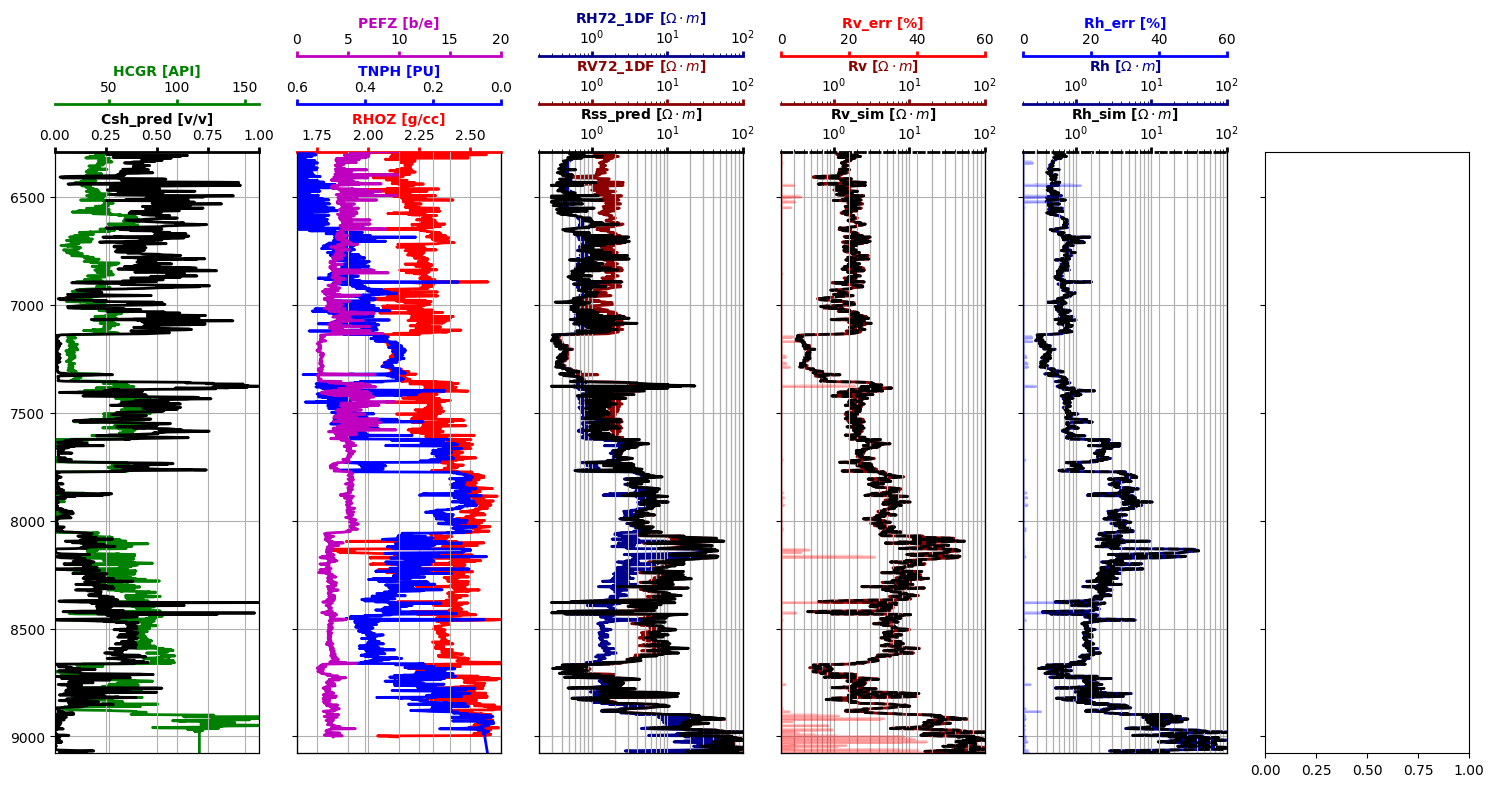

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(15,8), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axs

ymin = sol_akerbp.index.min()
ymax = sol_akerbp.index.max()
sol_akerbp['Rv_err'] = np.abs((sol_akerbp['Rv'] - sol_akerbp['Rv_sim'])/sol_akerbp['Rv'])*100
sol_akerbp['Rh_err'] = np.abs((sol_akerbp['Rh'] - sol_akerbp['Rh_sim'])/sol_akerbp['Rh'])*100

ax11 = ax1.twiny()
plot_curve(ax11, sol_akerbp, 'Csh_pred', lb=0, ub=1, color='k', units='v/v')
plot_curve(ax1, data_akerbp, 'HCGR', lb=10, ub=160, color='g', units='API', pad=8)

ax21, ax22 = ax2.twiny(), ax2.twiny()
plot_curve(ax2, data_akerbp, 'RHOZ', lb=1.65, ub=2.65, color='r', units='g/cc')
plot_curve(ax21, data_akerbp, 'TNPH', lb=0.6, ub=0.0, color='b', units='PU', pad=8)
plot_curve(ax22, data_akerbp, 'PEFZ', lb=0, ub=20, color='m', units='b/e', pad=16)

ax31, ax32 = ax3.twiny(), ax3.twiny()
plot_curve(ax3, data_akerbp, 'RV72_1DF', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax31, data_akerbp, 'RH72_1DF', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=16)
plot_curve(ax32, sol_akerbp, 'Rss_pred', lb=0.2, ub=100, color='k', units='$\Omega\cdot m$', semilog=True)

ax41, ax42 = ax4.twiny(), ax4.twiny()
plot_curve(ax4, sol_akerbp, 'Rv', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax41, sol_akerbp, 'Rv_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax42, sol_akerbp, 'Rv_err', lb=0, ub=60, color='r', fill=True, alpha=0.2, units='%', pad=16)

ax51, ax52 = ax5.twiny(), ax5.twiny()
plot_curve(ax5, sol_akerbp, 'Rh', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax51, sol_akerbp, 'Rh_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax52, sol_akerbp, 'Rh_err', lb=0, ub=60, color='b', fill=True, alpha=0.2, units='%', pad=16)

ax1.set(ylim=(ymin, ymax))
ax1.invert_yaxis()
plt.tight_layout()
plt.show()

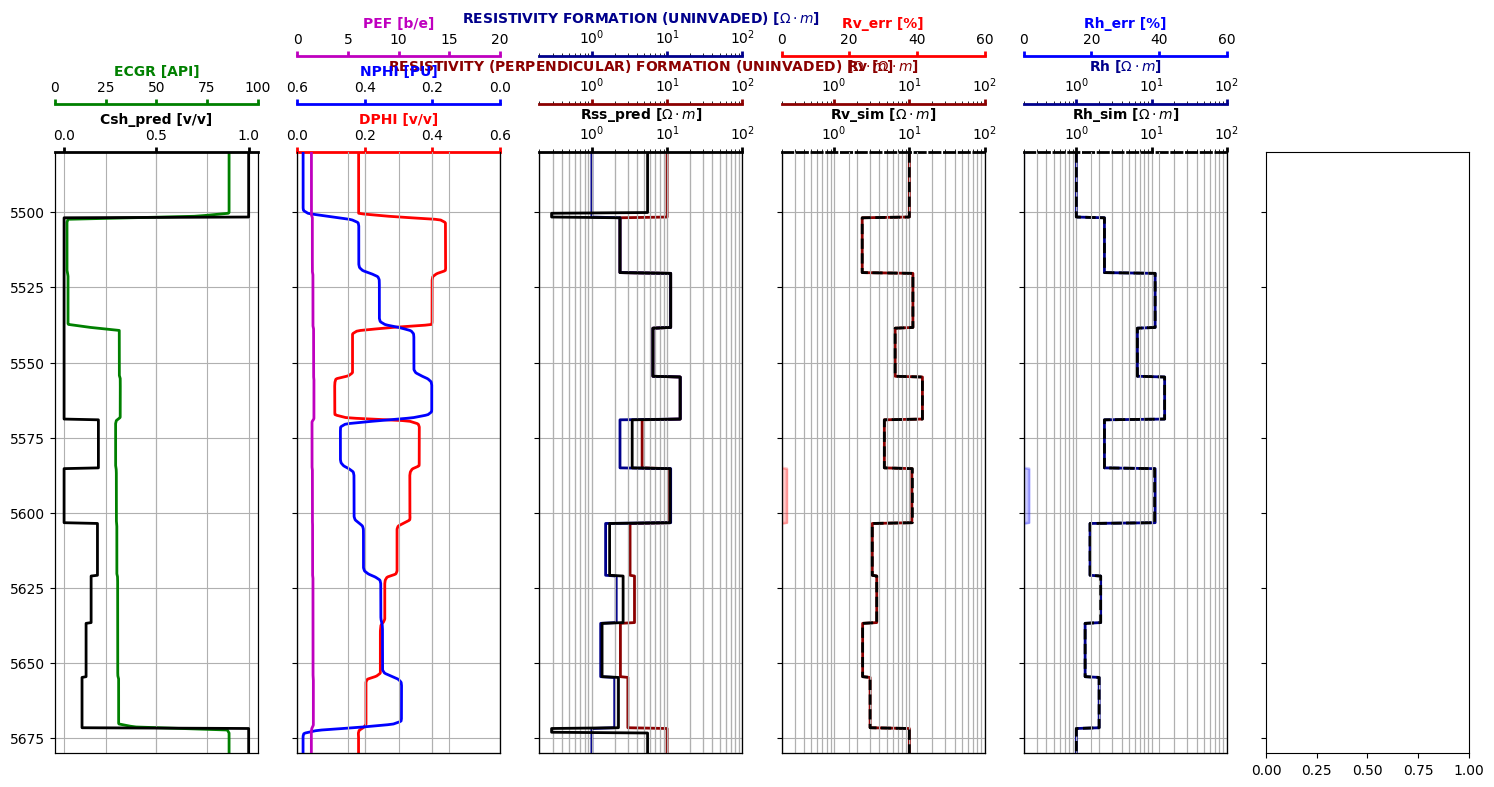

In [5]:
fig, axs = plt.subplots(1, 6, figsize=(15,8), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axs

ymin = sol_syn1.index.min()
ymax = sol_syn1.index.max()
sol_syn1['Rv_err'] = np.abs((sol_syn1['Rv'] - sol_syn1['Rv_sim'])/sol_syn1['Rv'])*100
sol_syn1['Rh_err'] = np.abs((sol_syn1['Rh'] - sol_syn1['Rh_sim'])/sol_syn1['Rh'])*100

ax11 = ax1.twiny()
plot_curve(ax11, sol_syn1, 'Csh_pred', lb=-0.05, ub=1.05, color='k', units='v/v')
plot_curve(ax1, data_syn1, 'ECGR', lb=0, ub=100, color='g', units='API', pad=8)

ax21, ax22 = ax2.twiny(), ax2.twiny()
plot_curve(ax2, data_syn1, 'DPHI', lb=0, ub=0.6, color='r', units='v/v')
plot_curve(ax21, data_syn1, 'NPHI', lb=0.6, ub=0.0, color='b', units='PU', pad=8)
plot_curve(ax22, data_syn1, 'PEF', lb=0, ub=20, color='m', units='b/e', pad=16)

ax31, ax32 = ax3.twiny(), ax3.twiny()
plot_curve(ax3, data_syn1, 'RESISTIVITY (PERPENDICULAR) FORMATION (UNINVADED)', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax31, data_syn1, 'RESISTIVITY FORMATION (UNINVADED)', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=16)
plot_curve(ax32, sol_syn1, 'Rss_pred', lb=0.2, ub=100, color='k', units='$\Omega\cdot m$', semilog=True)

ax41, ax42 = ax4.twiny(), ax4.twiny()
plot_curve(ax4, sol_syn1, 'Rv', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax41, sol_syn1, 'Rv_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax42, sol_syn1, 'Rv_err', lb=0, ub=60, color='r', fill=True, alpha=0.2, units='%', pad=16)

ax51, ax52 = ax5.twiny(), ax5.twiny()
plot_curve(ax5, sol_syn1, 'Rh', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax51, sol_syn1, 'Rh_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax52, sol_syn1, 'Rh_err', lb=0, ub=60, color='b', fill=True, alpha=0.2, units='%', pad=16)

ax1.set(ylim=(ymin, ymax))
ax1.invert_yaxis()
plt.tight_layout()
plt.show()

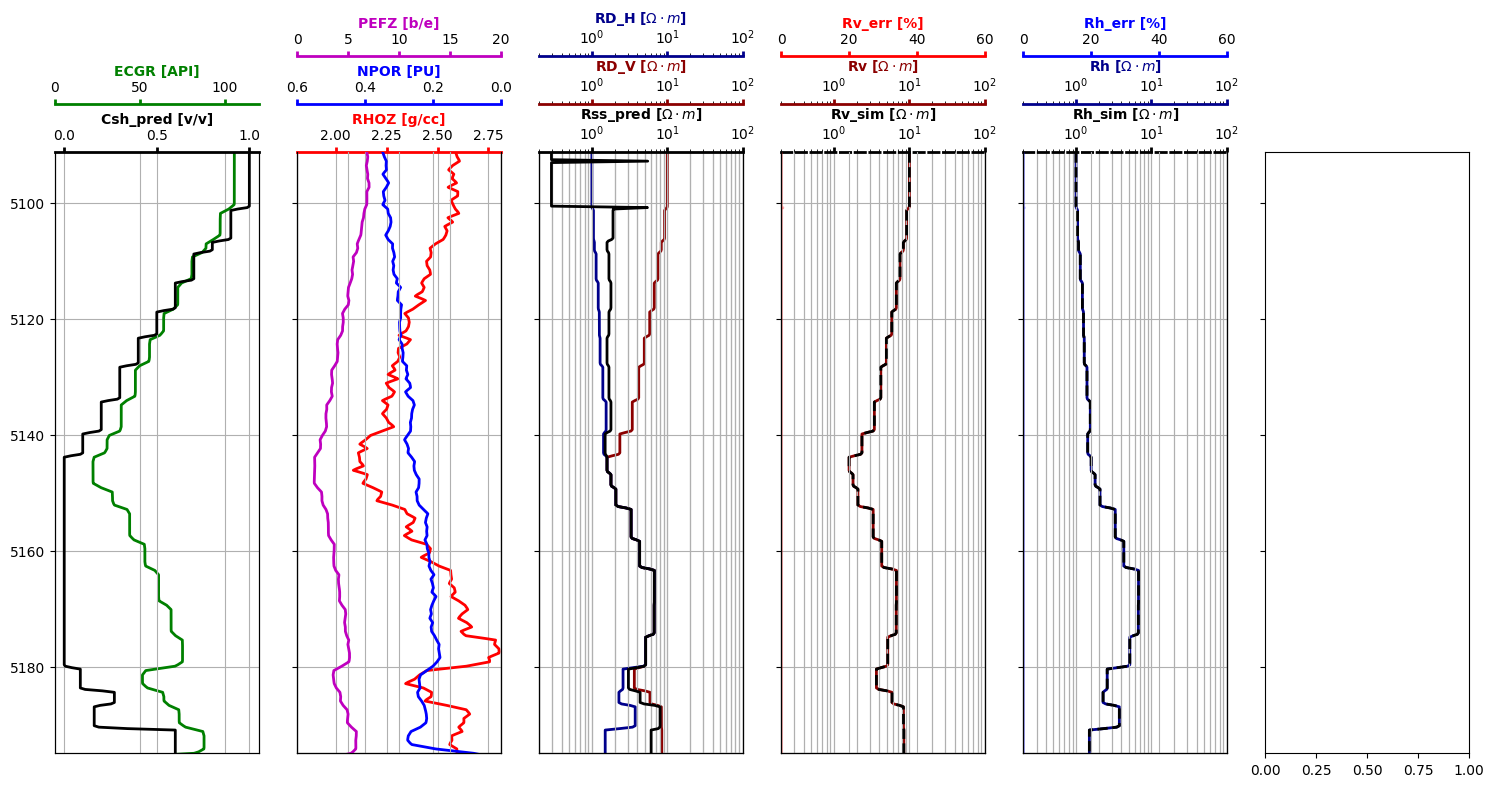

In [6]:
fig, axs = plt.subplots(1, 6, figsize=(15,8), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axs

ymin = sol_syn2.index.min()
ymax = sol_syn2.index.max()
sol_syn2['Rv_err'] = np.abs((sol_syn2['Rv'] - sol_syn2['Rv_sim'])/sol_syn2['Rv'])*100
sol_syn2['Rh_err'] = np.abs((sol_syn2['Rh'] - sol_syn2['Rh_sim'])/sol_syn2['Rh'])*100

ax11 = ax1.twiny()
plot_curve(ax11, sol_syn2, 'Csh_pred', lb=-0.05, ub=1.05, color='k', units='v/v')
plot_curve(ax1, data_syn2, 'ECGR', lb=0, ub=120, color='g', units='API', pad=8)

ax21, ax22 = ax2.twiny(), ax2.twiny()
plot_curve(ax2, data_syn2, 'RHOZ', lb=1.81, ub=2.81, color='r', units='g/cc')
plot_curve(ax21, data_syn2, 'NPOR', lb=0.6, ub=0.0, color='b', units='PU', pad=8)
plot_curve(ax22, data_syn2, 'PEFZ', lb=0, ub=20, color='m', units='b/e', pad=16)

ax31, ax32 = ax3.twiny(), ax3.twiny()
plot_curve(ax3, data_syn2, 'RD_V', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax31, data_syn2, 'RD_H', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=16)
plot_curve(ax32, sol_syn2, 'Rss_pred', lb=0.2, ub=100, color='k', units='$\Omega\cdot m$', semilog=True)

ax41, ax42 = ax4.twiny(), ax4.twiny()
plot_curve(ax4, sol_syn2, 'Rv', lb=0.2, ub=100, color='darkred', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax41, sol_syn2, 'Rv_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax42, sol_syn2, 'Rv_err', lb=0, ub=60, color='r', fill=True, alpha=0.2, units='%', pad=16)

ax51, ax52 = ax5.twiny(), ax5.twiny()
plot_curve(ax5, sol_syn2, 'Rh', lb=0.2, ub=100, color='darkblue', units='$\Omega\cdot m$', semilog=True, pad=8)
plot_curve(ax51, sol_syn2, 'Rh_sim', lb=0.2, ub=100, color='k', ls='--', units='$\Omega\cdot m$', semilog=True)
plot_curve(ax52, sol_syn2, 'Rh_err', lb=0, ub=60, color='b', fill=True, alpha=0.2, units='%', pad=16)

ax1.set(ylim=(ymin, ymax))
ax1.invert_yaxis()
plt.tight_layout()
plt.show()

***
# END